Trial 50 Complete [00h 00m 39s]
val_loss: 0.05708499625325203

Best val_loss So Far: 0.05244557932019234
Total elapsed time: 00h 32m 34s
INFO:tensorflow:Oracle triggered exit
Best hyperparameters:
{'space': [{'class_name': 'Float', 'config': {'name': 'dropout_rate', 'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}}, {'class_name': 'Choice', 'config': {'name': 'learning_rate', 'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}}, {'class_name': 'Choice', 'config': {'name': 'optimizer', 'default': 'adam', 'conditions': [], 'values': ['adam', 'sgd'], 'ordered': False}}, {'class_name': 'Int', 'config': {'name': 'batch_size', 'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}}, {'class_name': 'Choice', 'config': {'name': 'beta1', 'default': 0.5, 'conditions': [], 'values': [0.5, 0.75, 0.999], 'ordered': True}}, {'class_name': 'Choice', 'config': {'nam

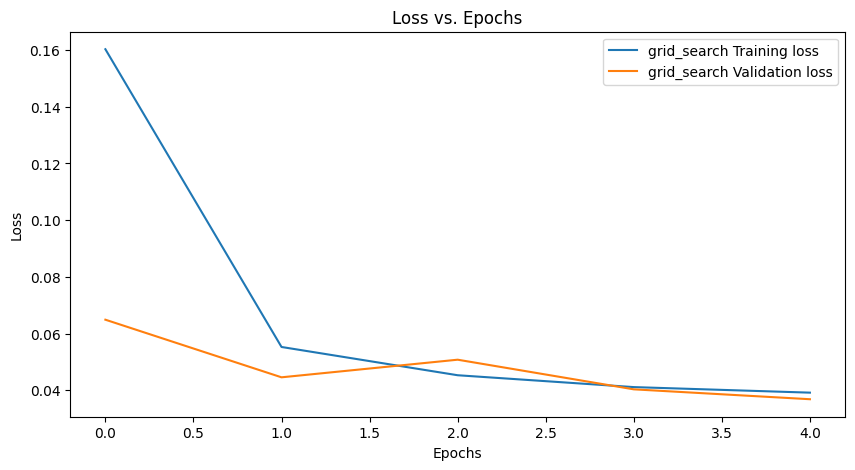

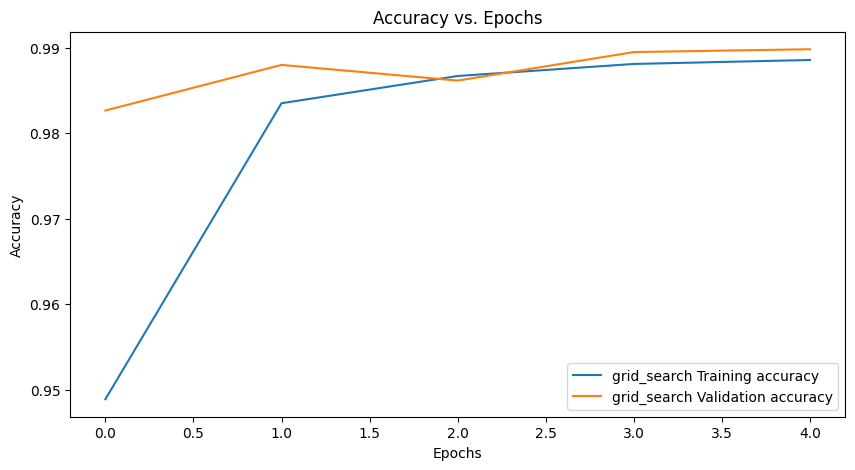

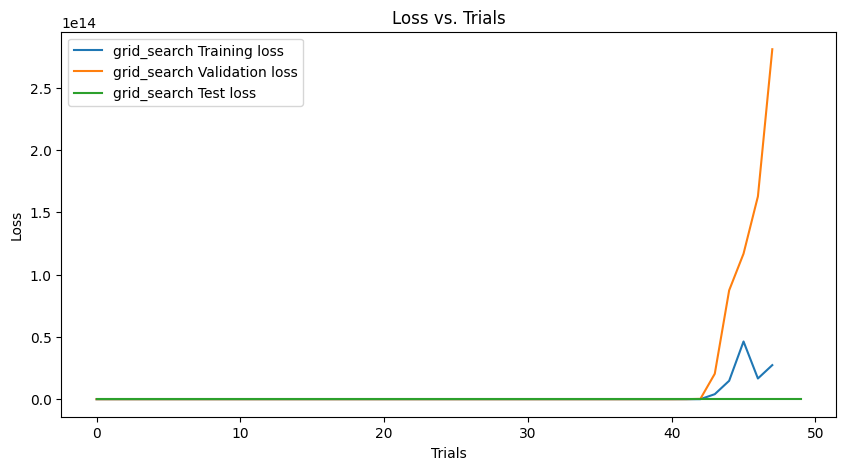

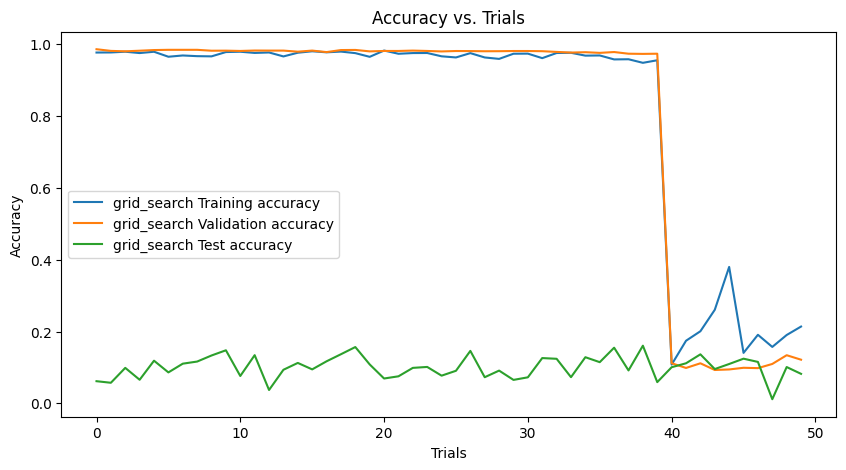

In [1]:
from myMain import DataLoader, MyHyperModel, NelderMeadHyperModel, TunerWrapper, PlotResults

if __name__ == "__main__":
    data_loader = DataLoader(n=60000)
    x_train, y_train, x_test, y_test = data_loader.load_data()

    # algorithms = ["grid_search", "random_search", "nelder_mead"]
    algorithms = ["grid_search"]
    results = {}
    results_trail = {}

    for algorithm in algorithms:
        print(f"Running {algorithm}...")

        if algorithm == "nelder_mead":
            hypermodel = NelderMeadHyperModel(num_classes=10)
        else:
            hypermodel = MyHyperModel(num_classes=10)

        tuner_wrapper = TunerWrapper(x_train, y_train, x_test, y_test)

        if algorithm == "grid_search":
            best_model, histories, histories_trail, best_parameters = tuner_wrapper.grid_search(hypermodel, "final#2", "grid")
        elif algorithm == "random_search":
            best_model, histories, histories_trail, best_parameters = tuner_wrapper.random_search(hypermodel, "final#2", "random")
        elif algorithm == "nelder_mead":
            best_model, histories, histories_trail, best_parameters = tuner_wrapper.nelder_mead_search(hypermodel)

        results_trail[algorithm] = histories_trail
        results[algorithm] = histories.history

    if isinstance(best_parameters, dict):
        print("Best hyperparameters: ", best_parameters)
    else:
        if algorithm == 'nelder_mead':
            print("Best hyperparameters: ", best_parameters)
        else:
            print("Best hyperparameters: ", best_parameters.get_config())

    # Plot the results
    myplot = PlotResults(results, results_trail)
    myplot.plot_loss_epoch()
    myplot.plot_accuracy_epoch()
    myplot.plot_loss_trials()
    myplot.plot_accuracy_trials()

Trial 50 Complete [00h 00m 36s]
val_loss: 0.06023688738544782

Best val_loss So Far: 0.04480258251229922
Total elapsed time: 00h 31m 12s
INFO:tensorflow:Oracle triggered exit
Best hyperparameters:
{'space': [{'class_name': 'Float', 'config': {'name': 'dropout_rate', 'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}}, {'class_name': 'Choice', 'config': {'name': 'learning_rate', 'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}}, {'class_name': 'Choice', 'config': {'name': 'optimizer', 'default': 'adam', 'conditions': [], 'values': ['adam', 'sgd'], 'ordered': False}}, {'class_name': 'Int', 'config': {'name': 'batch_size', 'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}}, {'class_name': 'Choice', 'config': {'name': 'beta1', 'default': 0.5, 'conditions': [], 'values': [0.5, 0.75, 0.999], 'ordered': True}}, {'class_name': 'Choice', 'config': {'nam

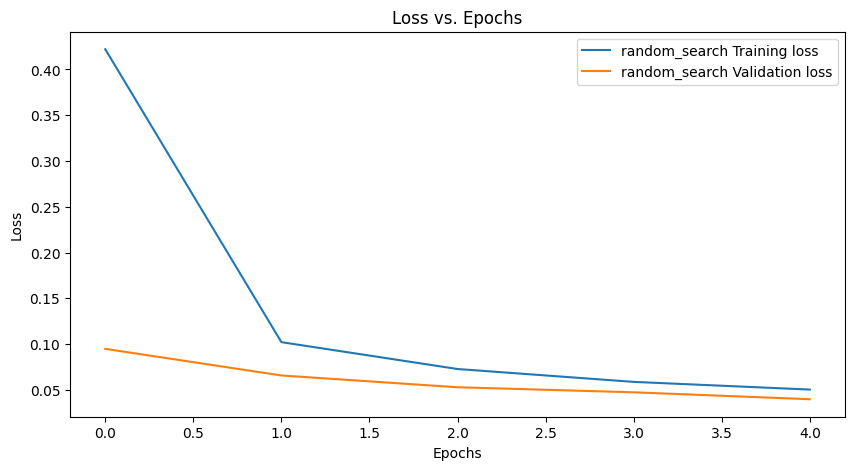

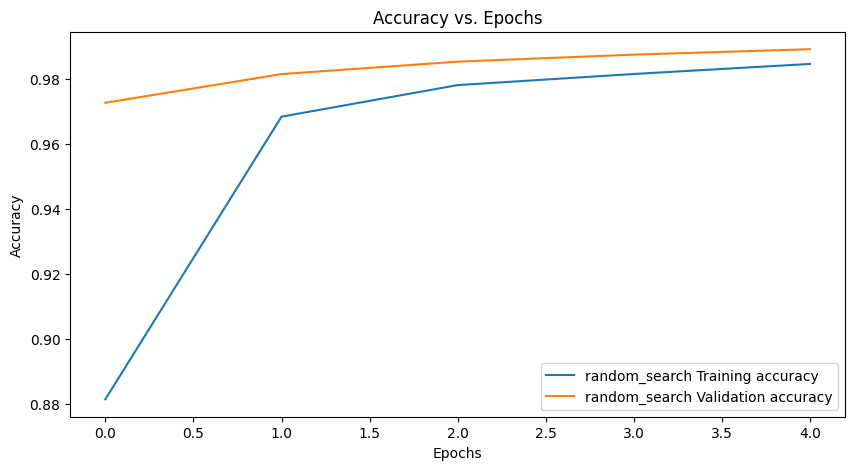

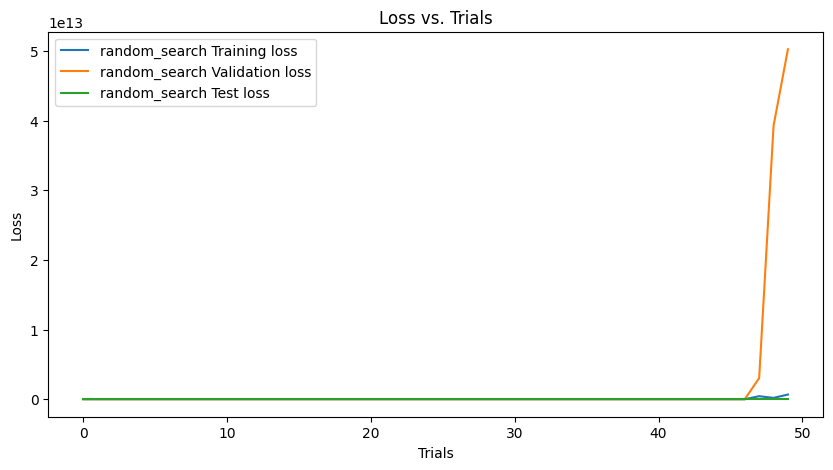

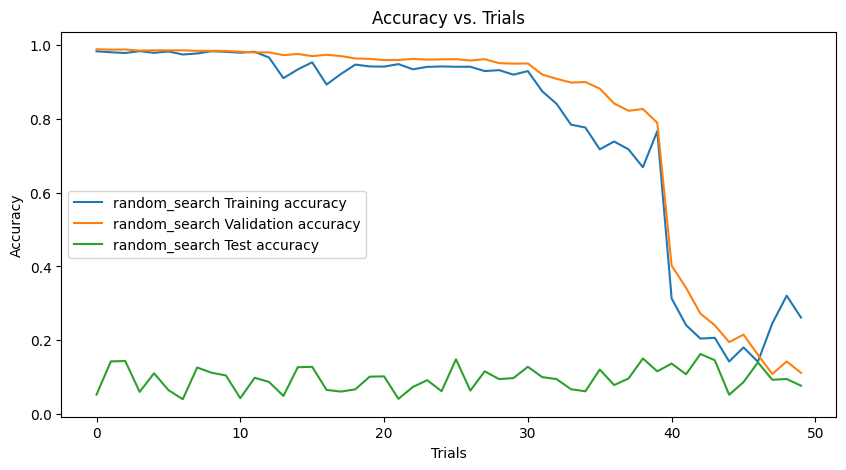

In [2]:
from myMain import DataLoader, MyHyperModel, NelderMeadHyperModel, TunerWrapper, PlotResults

if __name__ == "__main__":
    data_loader = DataLoader(n=60000)
    x_train, y_train, x_test, y_test = data_loader.load_data()

    # algorithms = ["grid_search", "random_search", "nelder_mead"]
    algorithms = ["random_search"]
    results = {}
    results_trail = {}

    for algorithm in algorithms:
        print(f"Running {algorithm}...")

        if algorithm == "nelder_mead":
            hypermodel = NelderMeadHyperModel(num_classes=10)
        else:
            hypermodel = MyHyperModel(num_classes=10)

        tuner_wrapper = TunerWrapper(x_train, y_train, x_test, y_test)

        if algorithm == "grid_search":
            best_model, histories, histories_trail, best_parameters = tuner_wrapper.grid_search(hypermodel, "final#2", "grid")
        elif algorithm == "random_search":
            best_model, histories, histories_trail, best_parameters = tuner_wrapper.random_search(hypermodel, "final#2", "random")
        elif algorithm == "nelder_mead":
            best_model, histories, histories_trail, best_parameters = tuner_wrapper.nelder_mead_search(hypermodel)

        results_trail[algorithm] = histories_trail
        results[algorithm] = histories.history

    if isinstance(best_parameters, dict):
        print("Best hyperparameters: ", best_parameters)
    else:
        if algorithm == 'nelder_mead':
            print("Best hyperparameters: ", best_parameters)
        else:
            print("Best hyperparameters: ", best_parameters.get_config())

    # Plot the results
    myplot = PlotResults(results, results_trail)
    myplot.plot_loss_epoch()
    myplot.plot_accuracy_epoch()
    myplot.plot_loss_trials()
    myplot.plot_accuracy_trials()

Running nelder_mead...
Epoch 1/5
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1695 - accuracy: 0.9483 - val_loss: 0.0583 - val_accuracy: 0.9832
Epoch 2/5
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0575 - accuracy: 0.9824 - val_loss: 0.0424 - val_accuracy: 0.9885
Epoch 3/5
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0414 - accuracy: 0.9875 - val_loss: 0.0396 - val_accuracy: 0.9895
Epoch 4/5
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0330 - accuracy: 0.9896 - val_loss: 0.0398 - val_accuracy: 0.9888
Epoch 5/5
313/313 [==============================] - 0s 765us/step - loss: 0.0281 - accuracy: 0.9915
Test loss: 0.028127800673246384
Test accuracy: 0.9915000200271606
Best hyperparameters:  [1.04639784e-03 0.00000000e+00 1.00426241e-01 3.17704451e+01
 8.98730671e-01 9.99000000e-01 9.00000000e-01]


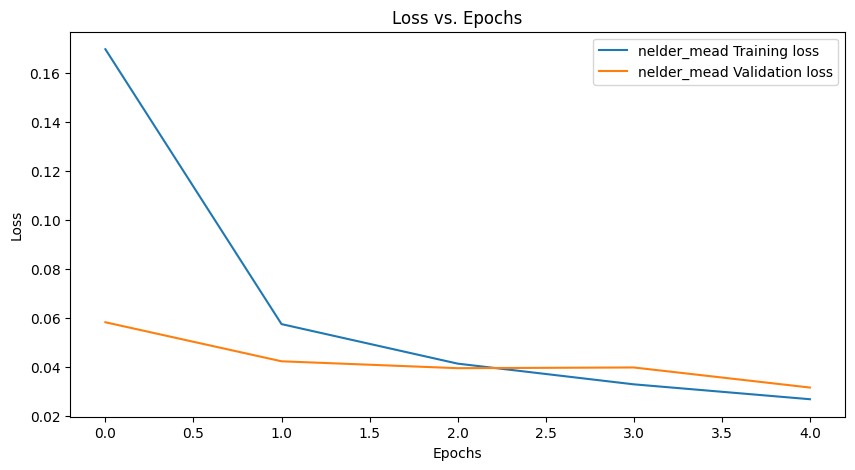

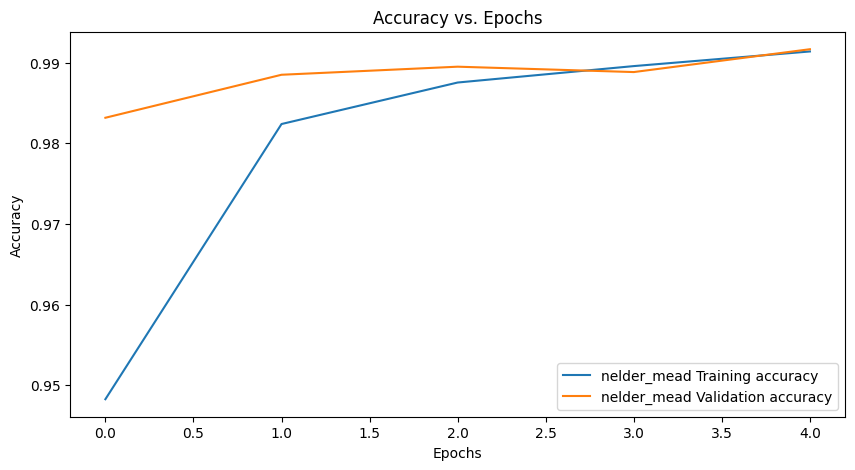

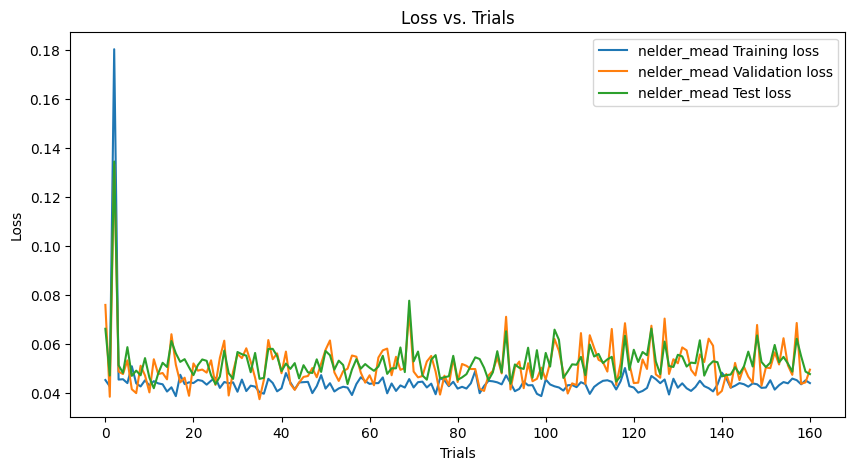

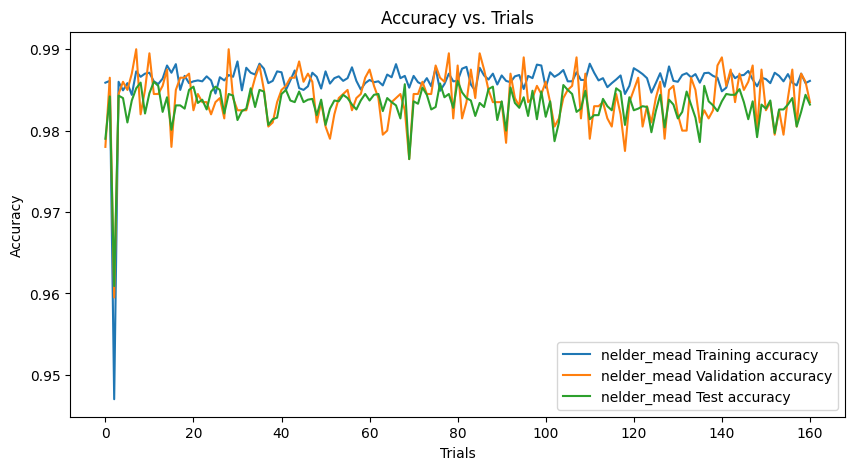

In [3]:
from myMain import DataLoader, MyHyperModel, NelderMeadHyperModel, TunerWrapper, PlotResults

if __name__ == "__main__":
    data_loader = DataLoader(n=60000)
    x_train, y_train, x_test, y_test = data_loader.load_data()

    # algorithms = ["grid_search", "random_search", "nelder_mead"]
    algorithms = ["nelder_mead"]
    results = {}
    results_trail = {}

    for algorithm in algorithms:
        print(f"Running {algorithm}...")

        if algorithm == "nelder_mead":
            hypermodel = NelderMeadHyperModel(num_classes=10)
        else:
            hypermodel = MyHyperModel(num_classes=10)

        tuner_wrapper = TunerWrapper(x_train, y_train, x_test, y_test)

        if algorithm == "grid_search":
            best_model, histories, histories_trail, best_parameters = tuner_wrapper.grid_search(hypermodel, "final#2", "grid")
        elif algorithm == "random_search":
            best_model, histories, histories_trail, best_parameters = tuner_wrapper.random_search(hypermodel, "final#2", "random")
        elif algorithm == "nelder_mead":
            best_model, histories, histories_trail, best_parameters = tuner_wrapper.nelder_mead_search(hypermodel)

        results_trail[algorithm] = histories_trail
        results[algorithm] = histories.history

    if isinstance(best_parameters, dict):
        print("Best hyperparameters: ", best_parameters)
    else:
        if algorithm == 'nelder_mead':
            print("Best hyperparameters: ", best_parameters)
        else:
            print("Best hyperparameters: ", best_parameters.get_config())

    # Plot the results
    myplot = PlotResults(results, results_trail)
    myplot.plot_loss_epoch()
    myplot.plot_accuracy_epoch()
    myplot.plot_loss_trials()
    myplot.plot_accuracy_trials()

In [4]:
# if isinstance(best_parameters, dict):
#     print("Best hyperparameters: ", best_parameters)
# else:
#     if algorithm == 'nelder_mead':
#         print("Best hyperparameters: ", best_parameters)
#     else:
#         print("Best hyperparameters: ", best_parameters.get_config())

# # Plot the results
# myplot = PlotResults(results, results_trail)
# myplot.plot_loss_epoch()
# myplot.plot_accuracy_epoch()
# myplot.plot_loss_trials()
# myplot.plot_accuracy_trials()